### Objective:  In this notebook, I am doing a grid search using logistic regression. 
I will do the grid search using 10 fold CV on a subset of the training data. 

### Load modules and the data

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, make_scorer

import numpy as np
import pandas as pd
import seaborn as sns
from os.path import join
from os import listdir
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows',999)
pd.set_option('display.max_columns', 999)
%matplotlib inline


In [60]:
base = join('/Users/crivera5/Documents/NonIntuitProjects/Kaggle/KaggleEEG','data_local')
data= pd.read_csv(join(base,'cleaned_training.csv'))

X = data.iloc[:, :-3].copy()
y = data.iloc[:,-1].copy()

### Split the data into test and train


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=4)

### Set up the pipeline and fit the data

In [5]:
scalar = StandardScaler()

clf = LogisticRegression(C = 1.0,
                          class_weight = None,
                          penalty = 'l1',
                          random_state = 444,
                          solver = 'liblinear')

pipeline = Pipeline([('scalar',StandardScaler()),
                     ('clf', clf)])
parameters = {'clf__C':np.logspace(-3,3,20), 'clf__class_weight':[None, 'balanced'],'clf__penalty':['l1','l2']}
model = GridSearchCV(pipeline, parameters, n_jobs = -1, scoring = 'roc_auc',verbose = True, cv = 10)
model.fit(X_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.5min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=444, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'clf__penalty': ['l1', 'l2'], 'clf__C': array([  1.00000e-04,   7.74264e-04,   5.99484e-03,   4.64159e-02,
         3.59381e-01,   2.78256e+00,   2.15443e+01,   1.66810e+02,
         1.29155e+03,   1.00000e+04]), 'clf__class_weight': [None, 'balanced']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=True)

In [16]:
c = model.best_estimator_.get_params()['clf']

In [58]:
coefs =pd.Series(c.coef_.tolist()[0])
coefs.index = X_test.columns
coefs = coefs[coefs>0]

ValueError: Length mismatch: Expected axis has 547 elements, new values have 546 elements

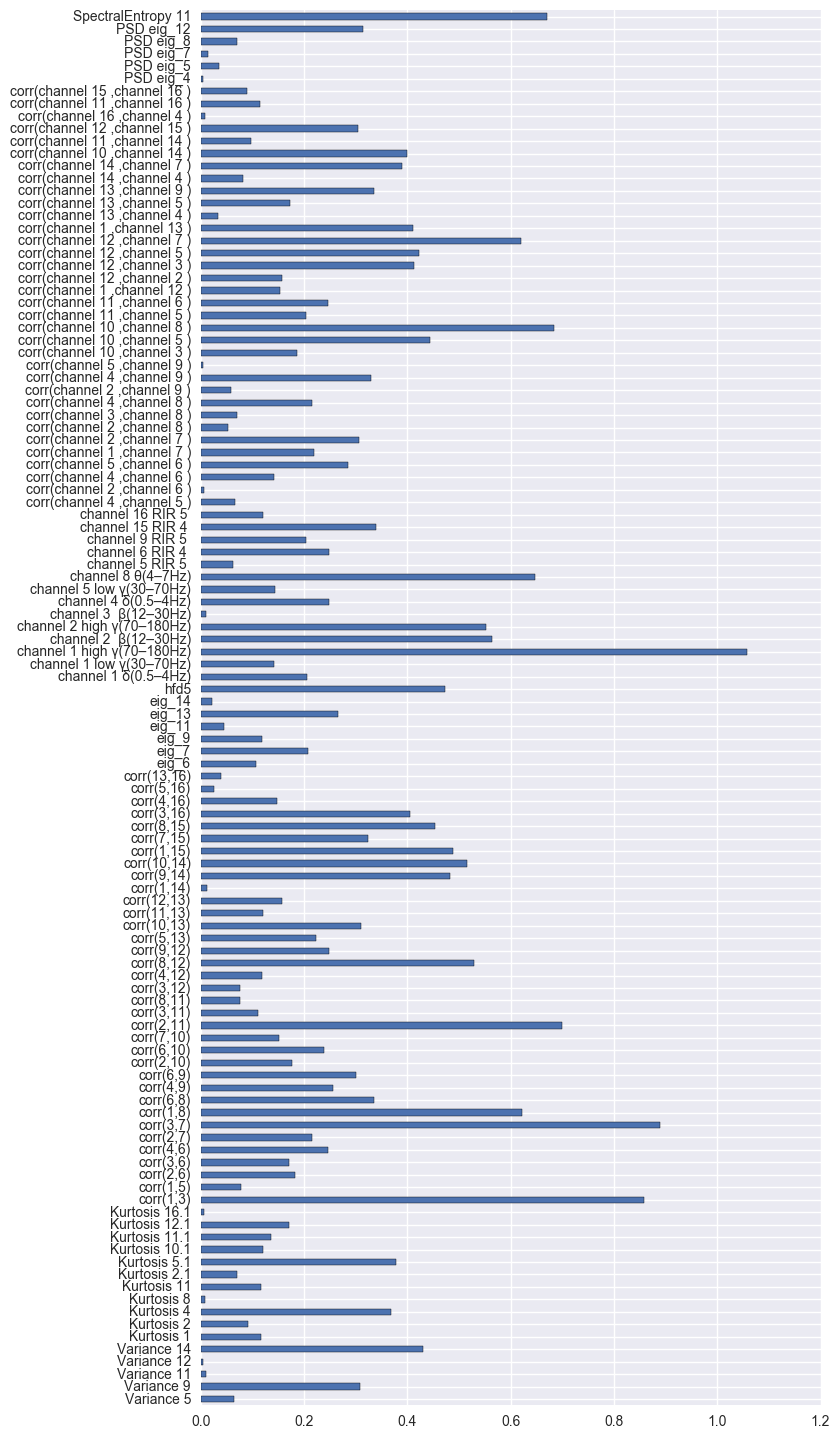

In [57]:
coefs[coefs>0].plot.barh(figsize= (8,18))